In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cbsodata
import seaborn as sns

In [3]:
toc = pd.DataFrame(cbsodata.get_table_list())

In [4]:
data = pd.DataFrame(cbsodata.get_data('80072NED'))
print(data.head())

   ID           BedrijfskenmerkenSBI2008          Perioden  \
0   0  A-U Alle economische activiteiten  1996 1e kwartaal   
1   1  A-U Alle economische activiteiten  1996 2e kwartaal   
2   2  A-U Alle economische activiteiten  1996 3e kwartaal   
3   3  A-U Alle economische activiteiten  1996 4e kwartaal   
4   4  A-U Alle economische activiteiten              1996   

   Ziekteverzuimpercentage_1  
0                        5.5  
1                        4.6  
2                        4.0  
3                        4.7  
4                        4.7  


Year         2016      2017      2018      2019      2020      2021      2022  \
Quarter                                                                         
1        4.333333  4.325641  4.879487  4.712821  5.200000  4.923077  6.448718   
2        3.741026  3.858974  4.082051  4.282051  4.561538  4.784615  5.510256   
3        3.528205  3.679487  3.902564  4.046154  4.451282  4.697436  5.100000   
4        4.074359  4.228205  4.361538  4.543590  5.030769  5.464103  5.687179   

Year         2023  
Quarter            
1        5.900000  
2        5.102564  
3        4.874359  
4        5.582051  


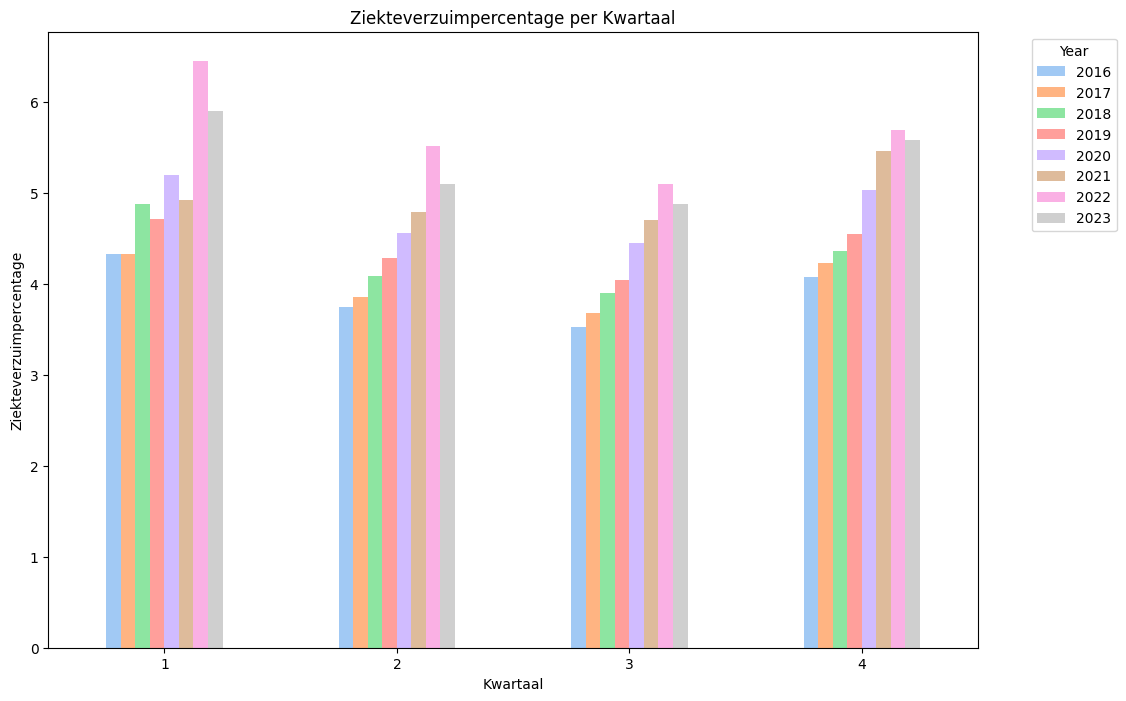

In [5]:
# Extract year and quarter from the 'Perioden' column
data['Year'] = data['Perioden'].str.extract(r'(\d{4})').astype(float)
data['Quarter'] = data['Perioden'].str.extract(r'(\d)e kwartaal').astype(float)

# Drop rows where Year or Quarter is NaN (e.g., full year periods)
data = data.dropna(subset=['Year', 'Quarter'])

# Convert Year and Quarter to integers
data['Year'] = data['Year'].astype(int)
data['Quarter'] = data['Quarter'].astype(int)

# Filter data to include only years from 2016 to 2023
data = data[(data['Year'] >= 2016) & (data['Year'] <= 2023)]

# Aggregate the data to handle duplicates
agg_data = data.groupby(['Quarter', 'Year']).agg({'Ziekteverzuimpercentage_1': 'mean'}).reset_index()

# Pivot the table to get years as columns and quarters as rows
pivot_data = agg_data.pivot(index='Quarter', columns='Year', values='Ziekteverzuimpercentage_1')

print(pivot_data.head())

# Set a pastel color palette
sns.set_palette("pastel")

# Plotting the bar plot
ax = pivot_data.plot(kind='bar', figsize=(12, 8), color=sns.color_palette("pastel", n_colors=len(pivot_data.columns)))
plt.title('Ziekteverzuimpercentage per Kwartaal')
plt.xlabel('Kwartaal')
plt.ylabel('Ziekteverzuimpercentage')

# Place the legend on the right
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Save the plot to a file before showing it
plt.savefig("bar_plot.png", bbox_inches='tight')

# Show the plot
plt.show()

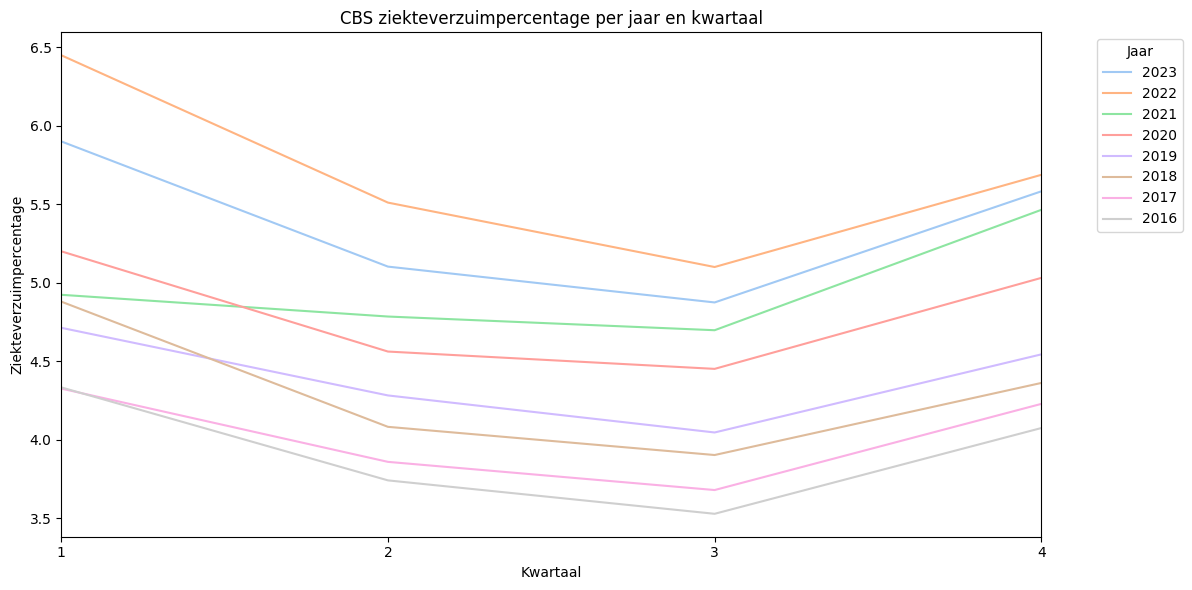

In [8]:
# Extract year and quarter from the 'Perioden' column
data['Year'] = data['Perioden'].str.extract(r'(\d{4})').astype(float)
data['Quarter'] = data['Perioden'].str.extract(r'(\d)e kwartaal').astype(float)

# Drop rows where Year or Quarter is NaN (e.g., full year periods)
data = data.dropna(subset=['Year', 'Quarter'])

# Convert Year and Quarter to integers
data['Year'] = data['Year'].astype(int)
data['Quarter'] = data['Quarter'].astype(int)

# Filter data to include only years from 2016 to 2023
data = data[(data['Year'] >= 2016) & (data['Year'] <= 2023)]

# Aggregate the data to handle duplicates
agg_data = data.groupby(['Quarter', 'Year']).agg({'Ziekteverzuimpercentage_1': 'mean'}).reset_index()

# Pivot the table to get years as columns and quarters as rows
pivot_data = agg_data.pivot(index='Quarter', values='Ziekteverzuimpercentage_1', columns='Year')

# Sort columns in descending order
pivot_data = pivot_data[sorted(pivot_data.columns, reverse=True)]

# Set a pastel color palette
sns.set_palette("pastel")

# Plotting the line chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_data.plot(kind='line', ax=ax)
plt.title('CBS ziekteverzuimpercentage per jaar en kwartaal')
plt.xlabel('Kwartaal')
plt.ylabel('Ziekteverzuimpercentage')
plt.legend(title='Jaar', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure x-axis labels are whole numbers
ax.set_xticks(pivot_data.index)
ax.set_xticklabels(pivot_data.index)

# Adjust axis limits to remove white margins
ax.set_xlim(pivot_data.index.min(), pivot_data.index.max())

# Remove remaining white margins
plt.tight_layout()

# Save the plot to a file before showing it
plt.savefig("line_plot.png", bbox_inches='tight')
plt.show()